## Importação e Pré-Processamento

In [318]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


plot = 0



### Importação

In [319]:
# Read the CSV file
df_train = pd.read_csv('dados_trabalho1/conjunto_de_treinamento.csv')
# Read the test CSV file
df_test = pd.read_csv('dados_trabalho1/conjunto_de_teste.csv')


In [320]:
if (plot):
    df_train.describe()

### Verificação manual de atributos

<!-- É interessante verificar manualmente quais colunas não podem influenciar a variável inadimplência, pois não faz sentido ... Isso evita que o modelo perca processamento com colunas que não influenciam a variável alvo. -->


In [321]:
df_train.columns

Index(['id_solicitante', 'produto_solicitado', 'dia_vencimento',
       'forma_envio_solicitacao', 'tipo_endereco', 'sexo', 'idade',
       'estado_civil', 'qtde_dependentes', 'grau_instrucao', 'nacionalidade',
       'estado_onde_nasceu', 'estado_onde_reside',
       'possui_telefone_residencial', 'codigo_area_telefone_residencial',
       'tipo_residencia', 'meses_na_residencia', 'possui_telefone_celular',
       'possui_email', 'renda_mensal_regular', 'renda_extra',
       'possui_cartao_visa', 'possui_cartao_mastercard',
       'possui_cartao_diners', 'possui_cartao_amex', 'possui_outros_cartoes',
       'qtde_contas_bancarias', 'qtde_contas_bancarias_especiais',
       'valor_patrimonio_pessoal', 'possui_carro',
       'vinculo_formal_com_empresa', 'estado_onde_trabalha',
       'possui_telefone_trabalho', 'codigo_area_telefone_trabalho',
       'meses_no_trabalho', 'profissao', 'ocupacao', 'profissao_companheiro',
       'grau_instrucao_companheiro', 'local_onde_reside',
       '

In [322]:
excluded_columns = ['id_solicitante' ]
df_train = df_train.drop(excluded_columns, axis=1)
df_test = df_test.drop(excluded_columns, axis=1)

### Codificação de atributos não numéricos


In [323]:

# Criar uma cópia dos dataframes originais
df_train_encoded = df_train.copy()
df_test_encoded = df_test.copy()

# Identificar colunas do tipo String
string_columns = df_train.select_dtypes(include=['object']).columns

# Inicializar o LabelEncoder
le = LabelEncoder()

# Codificar colunas do tipo String no dataframe de treino
for col in string_columns:
    df_train_encoded[col] = le.fit_transform(df_train_encoded[col])

# Codificar colunas do tipo String no dataframe de teste
for col in string_columns:
    df_test_encoded[col] = le.fit_transform(df_test_encoded[col])



### Verificar nulidades nos dados de teste.

In [324]:
# Verificar quais colunas têm valores nulos
null_columns_test = df_test_encoded.isnull().sum()
null_columns_test = null_columns_test[null_columns_test > 0]
print(null_columns_test)


tipo_residencia                125
meses_na_residencia            362
profissao                      762
ocupacao                       690
profissao_companheiro         2887
grau_instrucao_companheiro    3210
dtype: int64


In [325]:
if (not null_columns_test.empty):
    # Preencher valores nulos com a mediana das colunas
    df_test_encoded.fillna(df_test_encoded.median(), inplace=True)

# Verificar novamente se há valores nulos
null_columns_test_after = df_test_encoded.isnull().sum()
null_columns_test_after = null_columns_test_after[null_columns_test_after > 0]
print(null_columns_test_after)

Series([], dtype: int64)


### Verificação de colunas e linhas com null / NaN

In [326]:
# Verificar quais colunas têm valores nulos
null_columns = df_train_encoded.isnull().sum()
null_columns = null_columns[null_columns > 0]
print(null_columns)


tipo_residencia                 536
meses_na_residencia            1450
profissao                      3097
ocupacao                       2978
profissao_companheiro         11514
grau_instrucao_companheiro    12860
dtype: int64


In [327]:
# Filtrar apenas as colunas não nulas
non_null_columns = df_train_encoded.dropna(axis=1).columns

# DataFrame sem colunas nulas
df_no_null_columns = df_train_encoded.drop(columns=null_columns.index)

# Criar um DataFrame sem linhas com valores nulos
null_columns_to_drop = ['profissao_companheiro','grau_instrucao_companheiro']
df_no_null_rows = df_train_encoded.drop(columns=null_columns_to_drop).dropna()
df_test_no_null_rows = df_test_encoded.drop(columns=null_columns_to_drop).dropna()


### Selecionar dataSet

In [328]:
usingData = df_no_null_rows
usingTestData = df_test_no_null_rows

In [329]:
print(f'Shape:\nTreino: {usingData.shape}\nTeste:{usingTestData.shape}\n É esperado que o treino tenha uma variável a mais (alvo)')

Shape:
Treino: (15568, 39)
Teste:(5000, 38)
 É esperado que o treino tenha uma variável a mais (alvo)


### Discretizar valores float.


In [330]:
for colname in usingData.select_dtypes("float"):
    usingData[colname] = usingData[colname].astype(int)


In [331]:
discrete_features = usingData.dtypes == int
False in discrete_features

# Retorna False --> Todos os atributos sao discretos.

False

### MI Scores

In [332]:
# from sklearn.feature_selection import mutual_info_regression

# X = usingData.drop('inadimplente', axis = 1)
# y = usingData['inadimplente']

# def make_mi_scores(X, y, discrete_features):
#     mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
#     mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
#     mi_scores = mi_scores.sort_values(ascending=False)
#     return mi_scores

# mi_scores = make_mi_scores(usingData, y, discrete_features)
# mi_scores


In [333]:
# def plot_mi_scores(scores):
#     scores = scores.sort_values(ascending=True)
#     width = np.arange(len(scores))
#     ticks = list(scores.index)
#     plt.barh(width, scores)
#     plt.yticks(width, ticks)
#     plt.title("Mutual Information Scores")


# plt.figure(dpi=100, figsize=(10, 15))
# plot_mi_scores(mi_scores)


### Tratar Outliers

In [334]:
# A patir do plot de densidade, é possível observar que os atributos 'meses_na_residencia', 'meses_no_trabalho', 'qtde_dependentes', 'renda_mensal_regular', 'valor_patrimonio_pessoal' parecem ter outliers

#### Visualização Inicial

In [335]:
usingData['renda_extra'].value_counts()

renda_extra
0       14663
350       124
600        54
200        49
400        46
        ...  
594         1
815         1
3           1
1192        1
848         1
Name: count, Length: 252, dtype: int64

In [336]:
if(plot):
    sns.displot(usingData, x='renda_extra', hue='inadimplente', kind='kde', fill=True)
    plt.title('Distribuição de renda_extra em Função da Adimplência')
    plt.xlabel('renda_extra')
    plt.ylabel('Densidade')
    plt.show()

In [337]:
usingData['meses_na_residencia'].value_counts()

meses_na_residencia
1      2531
0      1733
10     1252
5      1177
2      1051
       ... 
100       1
71        1
67        1
81        1
54        1
Name: count, Length: 75, dtype: int64

In [338]:
if(plot):
    sns.displot(usingData, x='meses_na_residencia', hue='inadimplente', kind='kde', fill=True)
    plt.title('Distribuição de meses_na_residencia em Função da Adimplência')
    plt.xlabel('meses_na_residencia')
    plt.ylabel('Densidade')
    plt.show()

In [339]:
usingData['meses_no_trabalho'].value_counts()
# A contagem de pessoas / mes no trabalho demonstra que é uma informação


meses_no_trabalho
0     15547
1         5
2         4
3         3
4         2
6         2
14        1
5         1
32        1
15        1
30        1
Name: count, dtype: int64

In [340]:
if(plot):

    sns.displot(usingData, x='meses_no_trabalho', hue='inadimplente', kind='kde', fill=True)
    plt.title('Distribuição de meses_no_trabalho em Função da Adimplência')
    plt.xlabel('meses_no_trabalho')
    plt.ylabel('Densidade')
    plt.show()

In [341]:
usingData['qtde_dependentes'].value_counts()

qtde_dependentes
0     10097
1      2313
2      1802
3       861
4       285
5       121
6        42
7        16
8        10
9         7
10        6
11        4
13        2
53        1
14        1
Name: count, dtype: int64

In [342]:
if(plot):

    sns.displot(usingData, x='qtde_dependentes', hue='inadimplente', kind='kde', fill=True)
    plt.title('Distribuição de qtde_dependentes em Função da Adimplência')
    plt.xlabel('qtde_dependentes')
    plt.ylabel('Densidade')
    plt.show()

In [343]:
usingData['renda_mensal_regular'].value_counts()

renda_mensal_regular
350     2186
500      461
400      428
380      384
600      382
        ... 
1258       1
1552       1
1331       1
3034       1
2760       1
Name: count, Length: 1862, dtype: int64

In [344]:
if(plot):

    sns.displot(usingData, x='renda_mensal_regular', hue='inadimplente', kind='kde', fill=True)
    plt.title('Distribuição de renda_mensal_regular em Função da Adimplência')
    plt.xlabel('renda_mensal_regular')
    plt.ylabel('Densidade')
    plt.show()

In [345]:
usingData['valor_patrimonio_pessoal'].value_counts()

valor_patrimonio_pessoal
0        14809
30000       75
20000       73
25000       64
50000       62
         ...  
7500         1
72000        1
5600         1
3500         1
110          1
Name: count, Length: 85, dtype: int64

In [346]:
if(plot):

    sns.displot(usingData, x='valor_patrimonio_pessoal', hue='inadimplente', kind='kde', fill=True)
    plt.title('Distribuição de valor_patrimonio_pessoal em Função da Adimplência')
    plt.xlabel('valor_patrimonio_pessoal')
    plt.ylabel('Densidade')
    plt.show()

#### Filtragem por quantil

In [347]:
# Calcular o IQR para as colunas especificadas
columns_to_check = ['meses_na_residencia', 'meses_no_trabalho', 'qtde_dependentes', 'renda_mensal_regular', 'valor_patrimonio_pessoal', 'renda_extra']
Q1 = usingData[columns_to_check].quantile(0.0)
Q3 = usingData[columns_to_check].quantile(0.95)
IQR = Q3 - Q1



In [348]:
IQR

meses_na_residencia           30.0
meses_no_trabalho              0.0
qtde_dependentes               3.0
renda_mensal_regular        1731.0
valor_patrimonio_pessoal       0.0
renda_extra                  200.0
dtype: float64

In [349]:
# Filtrar os outliers (apenas para valores mais altos)
usingData2_no_outlier = usingData[~((usingData[columns_to_check] > (Q3 + 1.5 * IQR)).any(axis=1))]



#### Visualização final

In [350]:
usingData2_no_outlier['renda_extra'].value_counts()

renda_extra
0      13882
350      103
400       41
200       40
500       39
       ...  
75         1
397        1
295        1
405        1
3          1
Name: count, Length: 115, dtype: int64

In [351]:
if(plot):

    sns.displot(usingData2_no_outlier, x='renda_extra', hue='inadimplente', kind='kde', fill=True)
    plt.title('Distribuição de renda_extra em Função da Adimplência')
    plt.xlabel('renda_extra')
    plt.ylabel('Densidade')
    plt.show()

In [352]:
usingData2_no_outlier['meses_na_residencia'].value_counts()

meses_na_residencia
1     2452
0     1667
10    1137
5     1081
2      966
      ... 
72       1
68       1
61       1
71       1
54       1
Name: count, Length: 65, dtype: int64

In [353]:
if(plot):

    sns.displot(usingData2_no_outlier, x='meses_na_residencia', hue='inadimplente', kind='kde', fill=True)
    plt.title('Distribuição de meses_na_residencia em Função da Adimplência')
    plt.xlabel('meses_na_residencia')
    plt.ylabel('Densidade')
    plt.show()

In [354]:
usingData2_no_outlier['meses_no_trabalho'].value_counts()
# A contagem de pessoas / mes no trabalho demonstra que é uma informação


meses_no_trabalho
0    14379
Name: count, dtype: int64

In [355]:
if(plot):

    sns.displot(usingData2_no_outlier, x='meses_no_trabalho', hue='inadimplente', kind='kde', fill=True)
    plt.title('Distribuição de meses_no_trabalho em Função da Adimplência')
    plt.xlabel('meses_no_trabalho')
    plt.ylabel('Densidade')
    plt.show()

In [356]:
usingData2_no_outlier['qtde_dependentes'].value_counts()

qtde_dependentes
0    9421
1    2086
2    1657
3     782
4     266
5     112
6      40
7      15
Name: count, dtype: int64

In [357]:
if(plot):

    sns.displot(usingData2_no_outlier, x='qtde_dependentes', hue='inadimplente', kind='kde', fill=True)
    plt.title('Distribuição de qtde_dependentes em Função da Adimplência')
    plt.xlabel('qtde_dependentes')
    plt.ylabel('Densidade')
    plt.show()

In [358]:
usingData2_no_outlier['renda_mensal_regular'].value_counts()

renda_mensal_regular
350     2055
500      430
400      404
380      360
600      345
        ... 
2990       1
170        1
2119       1
1387       1
2810       1
Name: count, Length: 1716, dtype: int64

In [359]:
if(plot):

    sns.displot(usingData2_no_outlier, x='renda_mensal_regular', hue='inadimplente', kind='kde', fill=True)
    plt.title('Distribuição de renda_mensal_regular em Função da Adimplência')
    plt.xlabel('renda_mensal_regular')
    plt.ylabel('Densidade')
    plt.show()

In [360]:
usingData2_no_outlier['valor_patrimonio_pessoal'].value_counts()

valor_patrimonio_pessoal
0    14379
Name: count, dtype: int64

In [361]:
if(plot):

    sns.displot(usingData2_no_outlier, x='valor_patrimonio_pessoal', hue='inadimplente', kind='kde', fill=True)
    plt.title('Distribuição de valor_patrimonio_pessoal em Função da Adimplência')
    plt.xlabel('valor_patrimonio_pessoal')
    plt.ylabel('Densidade')
    plt.show()

#### Cortar colunas com valores unicos

In [362]:
# Colunas meses_no_trabalho e valor_patrimonio_pessoal ficaram com valores únicos, o que é inutil para o modelo.
excluded_columns2 = ['meses_no_trabalho' , 'valor_patrimonio_pessoal']
usingData2_no_outlier = usingData2_no_outlier.drop(excluded_columns2, axis=1)

#### Usar dataSet recortado?

In [425]:
if (1):
    usingData = usingData2_no_outlier.copy()

### Dividindo e Normalizando

In [426]:
from sklearn.model_selection import train_test_split


X = usingData.drop('inadimplente', axis = 1)
y = usingData['inadimplente']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Treino e predicao usando:

#### Using SMOTE with XGBoost Classifier

In [427]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE


In [428]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()


X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Normalized input data(X):\n", X_train_scaled)

Normalized input data(X):
 [[-0.27592255  1.75295777 -0.7109604  ...  1.60712012 -0.59394757
  -0.59394757]
 [ 5.75626696  1.75295777 -0.7109604  ...  0.95725536  1.63097727
   1.63097727]
 [-0.27592255 -0.46432589  0.97491416 ... -0.34247415 -0.51707009
  -0.51707009]
 ...
 [-0.27592255  1.75295777  0.97491416 ...  0.95725536  0.09342758
   0.09342758]
 [-0.27592255 -0.46432589  0.97491416 ... -0.34247415  0.87124684
   0.87124684]
 [-0.27592255 -1.20342044 -2.39683497 ...  0.95725536 -0.14172708
  -0.14172708]]


In [429]:
X_blc, y_blc = SMOTE().fit_resample(X_train_scaled, y_train) # ---> Cancela esse resample



In [430]:
## Busca por parametros

# # Define the hyperparameter grid for grid search
# param_grid = {
#     'n_estimators': [100, 200, 300, 800,850],    
#     'learning_rate': [0.01, 0.001, 0.1, 0.2],   
#     'max_depth': [3, 4, 5,6],              
# }


# grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='roc_auc', cv=10, n_jobs=-1)

# grid_search.fit(X_blc, y_blc) # Demorou 2 min e 22s



In [431]:
bestXgbModel = XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, monotone_constraints=None,
              multi_strategy=None, n_estimators=850, n_jobs=None,
              num_parallel_tree=None, random_state=None)


In [432]:
bestXgbModel.fit(X_blc, y_blc)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=850, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [433]:
y_pred = bestXgbModel.predict(X_test_scaled)


In [434]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)


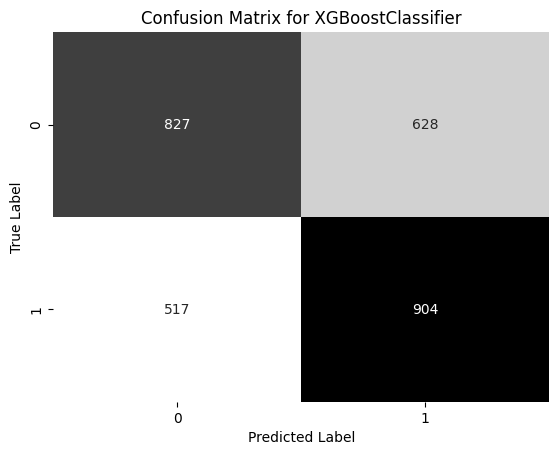

In [435]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greys', cbar=False)
plt.title('Confusion Matrix for XGBoostClassifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [436]:
from sklearn.metrics import classification_report

classification_rep = classification_report(y_test, y_pred)
print('\nClassification Report for XGBoostClassifier:')
print(classification_rep)



Classification Report for XGBoostClassifier:
              precision    recall  f1-score   support

           0       0.62      0.57      0.59      1455
           1       0.59      0.64      0.61      1421

    accuracy                           0.60      2876
   macro avg       0.60      0.60      0.60      2876
weighted avg       0.60      0.60      0.60      2876



#### Manually resampled with XGBoost Classifier

In [408]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler


In [409]:
# X_train = X_train[columns_to_adjust]
# X_test_old = X_test_old[columns_to_adjust]
# y_train = y_train
# y_test_old = y_test_old

In [410]:
scaler = StandardScaler()

X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test_old)
print("Normalized input data(X):\n", X_train_scaled)

Normalized input data(X):
 [[-0.27786882  1.7664426  -0.71627009 ...  1.61754242 -0.58719877
  -0.58719877]
 [-0.27786882  0.28221987 -0.71627009 ...  0.96707727 -0.03078638
  -0.03078638]
 [-0.27786882 -0.4598915   0.97560269 ... -0.98431818 -0.02181199
  -0.02181199]
 ...
 [-0.27786882  1.02433123 -0.71627009 ... -0.33385303  0.46280525
   0.46280525]
 [ 5.83403014 -1.20200286  0.97560269 ...  1.61754242  0.75896023
   0.75896023]
 [-0.27786882  1.02433123  0.97560269 ... -0.33385303  0.73203705
   0.73203705]]


In [411]:
X_blc, y_blc = X_train_scaled, y_train


In [412]:
## Busca por parametros

# # Define the hyperparameter grid for grid search
# param_grid = {
#     'n_estimators': [100, 200, 300, 800,850],    
#     'learning_rate': [0.01, 0.001, 0.1, 0.2],   
#     'max_depth': [3, 4, 5,6],              
# }


# grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='roc_auc', cv=10, n_jobs=-1)

# grid_search.fit(X_blc, y_blc) # Demorou 2 min e 22s



In [413]:
bestXgbModel = XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, monotone_constraints=None,
              multi_strategy=None, n_estimators=850, n_jobs=None,
              num_parallel_tree=None, random_state=None)


In [414]:
bestXgbModel.fit(X_blc, y_blc)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=850, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [415]:
y_pred = bestXgbModel.predict(X_test_scaled)


In [416]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test_old, y_pred)


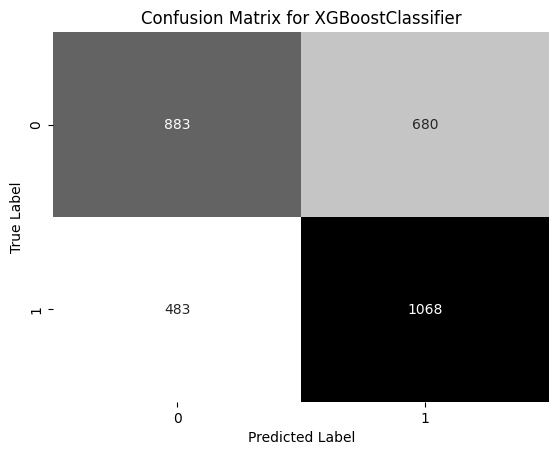

In [417]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greys', cbar=False)
plt.title('Confusion Matrix for XGBoostClassifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [418]:
from sklearn.metrics import classification_report

classification_rep = classification_report(y_test_old, y_pred)
print('\nClassification Report for XGBoostClassifier:')
print(classification_rep)



Classification Report for XGBoostClassifier:
              precision    recall  f1-score   support

           0       0.65      0.56      0.60      1563
           1       0.61      0.69      0.65      1551

    accuracy                           0.63      3114
   macro avg       0.63      0.63      0.63      3114
weighted avg       0.63      0.63      0.63      3114



In [424]:
from sklearn.feature_selection import RFE
for n_features_to_select1 in range(1,35):
    # Inicializar o modelo RFE com o bestXgbModel
    rfe = RFE(estimator=bestXgbModel, n_features_to_select=n_features_to_select1)  # Ajuste o número de atributos desejado

    # Ajustar o RFE ao conjunto de dados de treino
    rfe.fit(X_train_scaled, y_train)

    # Obter os atributos selecionados
    selected_features = X_train.columns[rfe.support_]
    print("Selected Features:", selected_features)

    # Transformar os conjuntos de dados de treino e teste para incluir apenas os atributos selecionados
    X_train_rfe = rfe.transform(X_train_scaled)
    X_test_rfe = rfe.transform(X_test_scaled)

    # Treinar o modelo com os atributos selecionados
    bestXgbModel.fit(X_train_rfe, y_train)

    # Fazer previsões no conjunto de teste
    y_pred_rfe = bestXgbModel.predict(X_test_rfe)

    # Avaliar o modelo
    conf_matrix_rfe = confusion_matrix(y_test_old, y_pred_rfe)
    classification_rep_rfe = classification_report(y_test_old, y_pred_rfe)

    print('\nConfusion Matrix for XGBoostClassifier with RFE:')
    print(conf_matrix_rfe)
    print('\nClassification Report for XGBoostClassifier with RFE:')
    print(classification_rep_rfe)

Selected Features: Index(['possui_telefone_residencial'], dtype='object')

Confusion Matrix for XGBoostClassifier with RFE:
[[1341  222]
 [1235  316]]

Classification Report for XGBoostClassifier with RFE:
              precision    recall  f1-score   support

           0       0.52      0.86      0.65      1563
           1       0.59      0.20      0.30      1551

    accuracy                           0.53      3114
   macro avg       0.55      0.53      0.48      3114
weighted avg       0.55      0.53      0.48      3114

Selected Features: Index(['dia_vencimento', 'possui_telefone_residencial'], dtype='object')

Confusion Matrix for XGBoostClassifier with RFE:
[[813 750]
 [631 920]]

Classification Report for XGBoostClassifier with RFE:
              precision    recall  f1-score   support

           0       0.56      0.52      0.54      1563
           1       0.55      0.59      0.57      1551

    accuracy                           0.56      3114
   macro avg       0.56      